In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/Windows 11/Downloads/movie dataset_2024.csv")

In [4]:
df.head()

,Release Group,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year
0,Inside Out 2,1595983694,637852840,40.0,958130854,60.0,2024
1,Deadpool & Wolverine,1043180185,506937007,48.6,536243178,51.4,2024
2,Despicable Me 4,808537571,332583715,41.1,475953856,58.9,2024
3,Dune: Part Two,711844358,282144358,39.6,429700000,60.4,2024
4,Godzilla x Kong: The New Empire,567650016,196350016,34.6,371300000,65.4,2024


In [6]:
df.shape

(200, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Release Group     200 non-null    object 
 1   Worldwide         200 non-null    int64  
 2   Domestic          200 non-null    int64  
 3   Domestic_percent  200 non-null    float64
 4   Foreign           200 non-null    int64  
 5   Foreign_percent   200 non-null    float64
 6   year              200 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 11.1+ KB


In [8]:
df.describe()

,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year
count,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,200.000000,200.0
mean,5.603975e+07,2.330327e+07,28.793500,3.273647e+07,71.206000,2024.0
std,1.690567e+08,7.291482e+07,36.181713,9.836093e+07,36.182427,0.0
min,2.739320e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,2024.0
25%,3.926778e+06,0.000000e+00,0.000000,3.279578e+06,41.275000,2024.0
50%,8.515232e+06,0.000000e+00,0.000000,5.420353e+06,100.000000,2024.0
75%,2.809567e+07,1.006064e+07,58.725000,1.829751e+07,100.000000,2024.0
max,1.595984e+09,6.378528e+08,100.000000,9.581309e+08,100.000000,2024.0


Checking for missing values

In [9]:
df.isnull().sum()

Release Group       0
Worldwide           0
Domestic            0
Domestic_percent    0
Foreign             0
Foreign_percent     0
year                0
dtype: int64

Check for duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.dtypes

Release Group        object
Worldwide             int64
Domestic              int64
Domestic_percent    float64
Foreign               int64
Foreign_percent     float64
year                  int64
dtype: object

To clean the data 

In [12]:
df.fillna(0,inplace=True)

Therefore,no missing value is present in this dataset.

In [16]:
df.drop_duplicates(inplace=True)

Understanding column and cleaning up

In [17]:
for col in df.columns:
    print(col,df[col].unique()[:5])

Release Group ['Inside Out 2' 'Deadpool & Wolverine' 'Despicable Me 4' 'Dune: Part Two'
 'Godzilla x Kong: The New Empire']
Worldwide [1595983694 1043180185  808537571  711844358  567650016]
Domestic [637852840 506937007 332583715 282144358 196350016]
Domestic_percent [40.  48.6 41.1 39.6 34.6]
Foreign [958130854 536243178 475953856 429700000 371300000]
Foreign_percent [60.  51.4 58.9 60.4 65.4]
year [2024]


Data Visualization

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

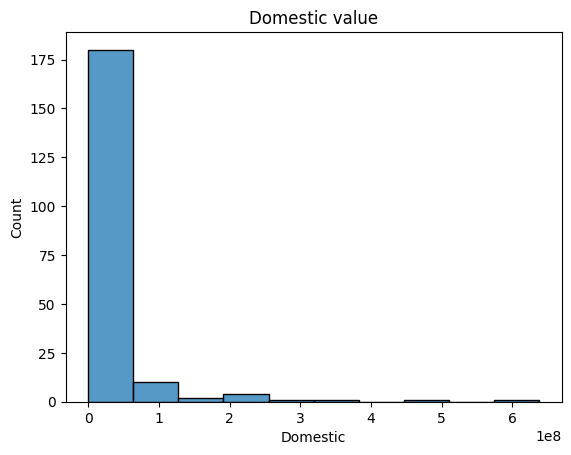

In [21]:
#Distribution of domestic values in movie dataset
sns.histplot(df['Domestic'],bins=10)
plt.title("Domestic value")
plt.show()

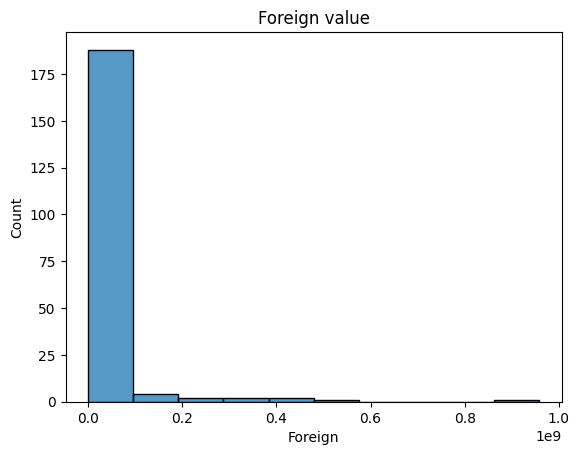

In [34]:
#Distribution of Foreign values in movie dataset
sns.histplot(df['Foreign'],bins=10)
plt.title("Foreign value")
plt.show()

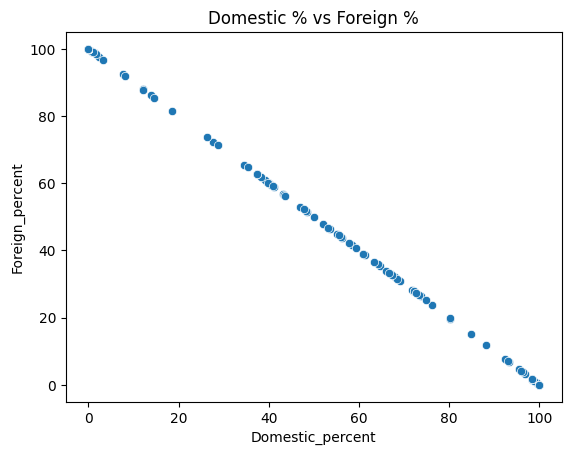

In [22]:
#Domestic_percent vs Foreign_percent
sns.scatterplot(data=df,x='Domestic_percent',y='Foreign_percent')
plt.title("Domestic % vs Foreign %")
plt.show()

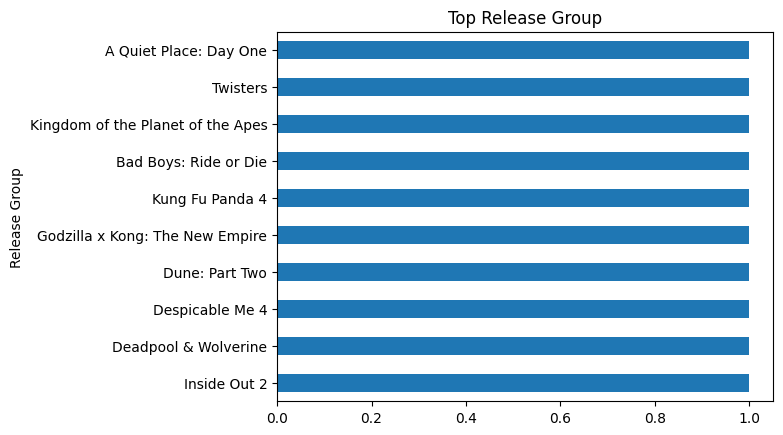

In [25]:
#Top RELEASE GROUP
df['Release Group'].value_counts().head(10).plot(kind='barh')
plt.title("Top Release Group")
plt.show()

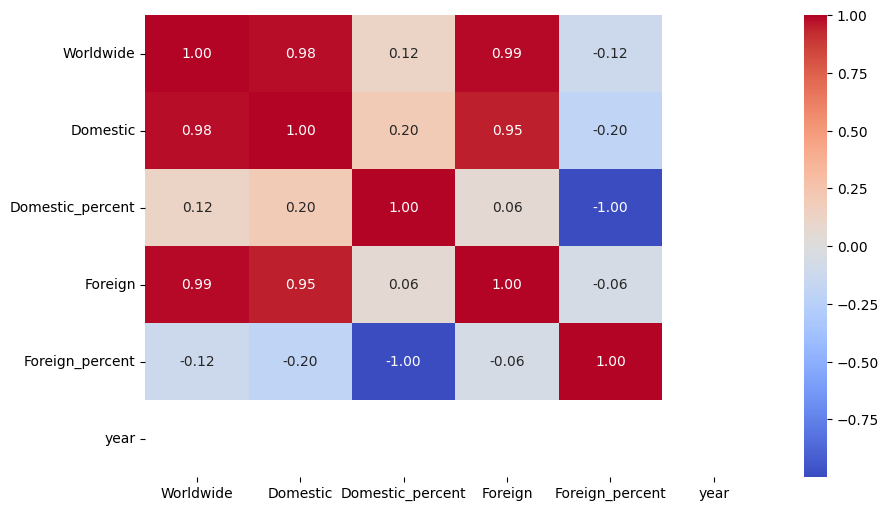

In [32]:
#Correlation Analysis
numeric_df=df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

Grouping and aggregation

In [35]:
df.groupby('Domestic')['Domestic_percent'].mean().sort_values(ascending=False)

Domestic
2927121    100.0
3427910    100.0
3162293    100.0
3060040    100.0
9482744    100.0
           ...  
251793       1.4
58690        1.0
144871       0.9
60720        0.6
0            0.0
Name: Domestic_percent, Length: 100, dtype: float64

<Axes: xlabel='year'>

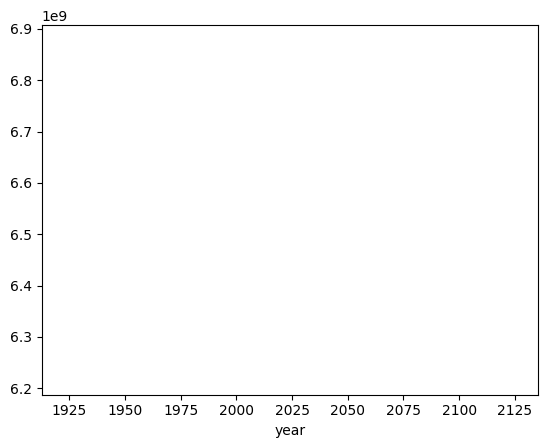

In [41]:
df.groupby('year')['Foreign'].sum().plot()

UNIVARIATE ANALYSIS

<Axes: xlabel='year'>

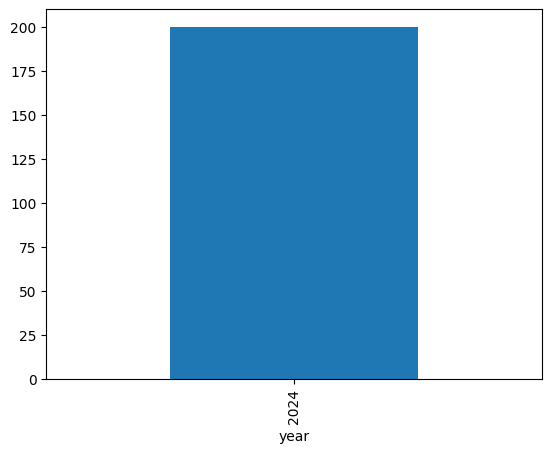

In [42]:
df['Worldwide'].hist(bins=30)
df['Domestic_percent'].plot(kind='box')
df['year'].value_counts().sort_index().plot(kind='bar')  # Number of movies per year


BIVARIATE ANALYSIS

<Axes: xlabel='Domestic', ylabel='Foreign'>

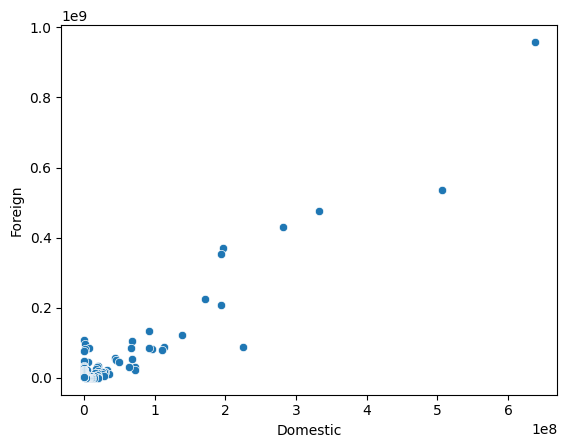

In [43]:

sns.scatterplot(x='Domestic', y='Foreign', data=df)

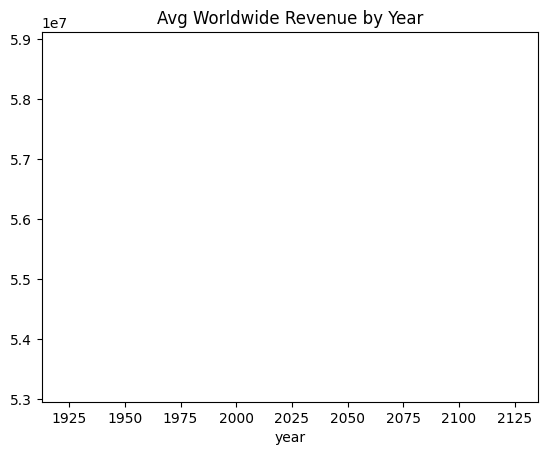

In [45]:
#Year vs Revenue
df.groupby('year')['Worldwide'].mean().plot(title='Avg Worldwide Revenue by Year')
plt.show()

In [46]:
#derived columns
df['Total_Calculated'] = df['Domestic'] + df['Foreign']
df['Mismatch'] = df['Worldwide'] - df['Total_Calculated']


In [47]:
#Top performers
top10 = df.sort_values(by='Worldwide', ascending=False).head(10)
print(top10[['Release Group', 'Worldwide']])


                       Release Group   Worldwide
0                       Inside Out 2  1595983694
1               Deadpool & Wolverine  1043180185
2                    Despicable Me 4   808537571
3                     Dune: Part Two   711844358
4    Godzilla x Kong: The New Empire   567650016
5                    Kung Fu Panda 4   547820030
6              Bad Boys: Ride or Die   400124003
7  Kingdom of the Planet of the Apes   397366385
8                           Twisters   313866855
9             A Quiet Place: Day One   260894737


Domestic vs Foreign analysis


<Axes: xlabel='Market_Dominance'>

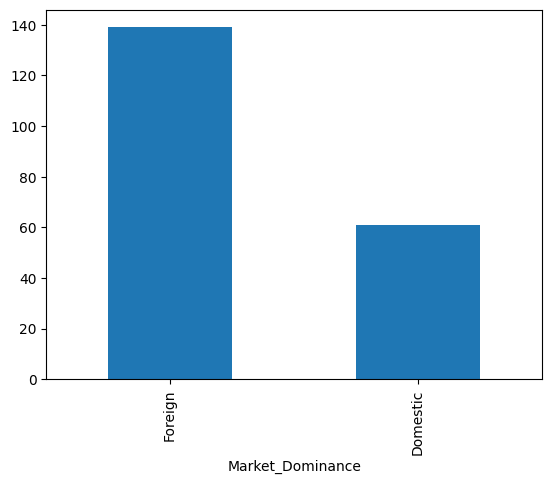

In [48]:
df['Market_Dominance'] = df.apply(lambda row: 'Domestic' if row['Domestic_percent'] > row['Foreign_percent'] else 'Foreign', axis=1)
df['Market_Dominance'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'Average Revenue Over Time')

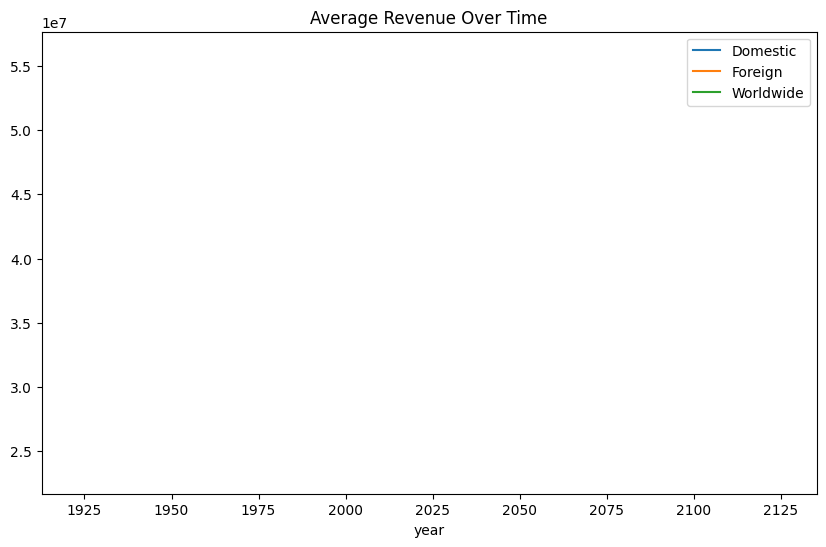

In [50]:
df.groupby('year')[['Domestic', 'Foreign', 'Worldwide']].mean().plot(figsize=(10,6))
plt.title("Average Revenue Over Time")



CONCLUSION
-----------
The analysis shows that most movies earn a significant portion of their revenue from foreign markets, indicating global audience impact.
Top-grossing films heavily influence overall revenue trends. Year-wise fluctuations suggest changing market dynamics and audience preferences over time.
